# SYDE 552 Assignment 2: Vision
### Due Monday, February 19, 11:59pm
### Value: 15% of total marks for the course

This assignment covers the mammilian vision system, including both questions about the biology itself and constructing computational models based on Regression and Convolutional Neural Networks.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

# 1. The Vision System

The purpose of this part of the assignment is to test your knowledge of the brain’s visual system and the relationship between neurobiological features and computational properties. The best answers will discuss both function and anatomy, and will draw on specific anatomical examples to support theoretical claims. You are encouraged to discuss answers with your classmates, consult the slides notes, or use external resources -- but your answers must be your own! In particular, read the Kandel et al. chapters listed on the slides. Expect to write around 5 sentences for each 1 point.

**1.a) [2 marks]** The neurons in different parts of the brain are sensitive to different things, and can be thought of as different feature detectors.  For each of the types of neurons listed below, describe what feature they detect, their receptive fields, and how their connectivity to other neurons and/or their internal neural processes helps them to do this feature detection:
- **Cones:**
  - *Feature Detected:* Cones are photoreceptor cells in the retina that detect color and function well in bright light (Kandel et al.).
  - *Receptive Fields:* Cones have small receptive fields that allow for high visual acuity. Each cone is sensitive to a specific wavelength, contributing to color vision.
  - *Connectivity/Internal Processes:* Cones connect to bipolar cells, forming the basis of the cone-bipolar cell pathway. This connectivity allows for the processing of color information, as cones are responsible for encoding different wavelengths of light. The parallel processing of color information by cones contributes to the brain's ability to perceive a wide spectrum of colors.

- **Sustained Ganglion Cells:**
  - *Feature Detected:* Sustained ganglion cells are sensitive to sustained visual stimuli and are involved in detecting the presence of a continuous feature in the visual field.
  - *Receptive Fields:* Sustained ganglion cells have larger receptive fields compared to cones, enabling them to respond to a broader area of the visual field.
  - *Connectivity/Internal Processes:* Sustained ganglion cells receive input from bipolar cells, integrating signals over time. This sustained response allows them to signal the presence of a continuous feature, such as the orientation of a line, as it persists in the visual scene.

- **Transient Ganglion Cells:**
  - *Feature Detected:* Transient ganglion cells are sensitive to changes in visual stimuli, detecting motion and rapid alterations in the visual scene.
  - *Receptive Fields:* Transient ganglion cells have relatively large receptive fields, allowing them to respond to changes occurring over a broader spatial area.
  - *Connectivity/Internal Processes:* These cells are connected to bipolar cells and are specialized in detecting temporal changes. The rapid response and short integration time of transient ganglion cells make them crucial for detecting motion and sudden visual transitions in the environment.

- **Simple Cells:**
  - *Feature Detected:* Simple cells are found in the primary visual cortex and respond to a certain spatial orientation (Kandel et al.).
  - *Receptive Fields:* Simple cells have elongated receptive fields and are sensitive to the orientation of visual stimuli.
  - *Connectivity/Internal Processes:* Simple cells integrate inputs from thalamic neurons, specifically those from the lateral geniculate nucleus. They exhibit spatial summation and respond most strongly to stimuli with a particular orientation within their receptive field. This selectivity for orientation contributes to the brain's ability to perceive complex visual patterns and shapes.


**1. b) [1 marks]** Describe two instances where retinotopic organization facilitates visual processing.  For each example, be sure to mention its anatomical location and discuss how retinitopy contributes to the feature detection.

- **Primary Visual Cortex (V1):** (Kandel et al.)
  - *Anatomical Location:* The primary visual cortex (V1) is located in the occipital lobe at the posterior part of the brain.
  - *Contribution to Feature Detection:* Retinotopic organization in V1 ensures that adjacent regions in the retina are mapped to neighboring locations in the cortex. This spatial arrangement allows for the preservation of the spatial relationships of visual stimuli. For example, neurons in adjacent regions of V1 respond to adjacent portions of the visual field. This organization is crucial for the perception of basic visual features, such as edges, orientations, and spatial frequencies.

- **Superior Colliculus:** (https://www.nature.com/articles/s41467-023-43218)
  - *Anatomical Location:* The superior colliculus is a midbrain structure involved in visual processing and is situated posterior to the thalamus.
  - *Contribution to Feature Detection:* Retinotopic organization in the superior colliculus is vital for the integration of visual information with motor responses, particularly in the context of eye movements. Neurons in the superior colliculus receive inputs from the retina and are arranged retinotopically. This organization allows for the precise coordination of eye movements with specific visual stimuli. For instance, when the eyes need to move towards a particular object in the visual field, the retinotopic mapping in the superior colliculus facilitates the accurate localization of the target and the initiation of the corresponding eye movement.


**1. c) [2 marks]** Discuss the similarities and differences between convolutional neural networks and the visual system.

- **Similarities:**
  - *Hierarchical Feature Extraction:* Both CNNs and the visual system employ a hierarchical approach for feature extraction. In CNNs, multiple layers learn increasingly complex features from the input data. Similarly, the visual system processes visual information through hierarchical pathways, from simple features in the retina to more complex representations in higher cortical areas.
  - *Local Receptive Fields:* CNNs utilize local receptive fields in their convolutional layers to capture spatial hierarchies. Similarly, neurons in the visual system, such as those in the retina and primary visual cortex, have receptive fields that respond to specific regions of the visual field.

- **Differences:**
  - *Biological Plausibility:* The visual system is a highly complex and biologically evolved system, whereas CNNs are artificial neural networks designed for specific tasks. The biological plausibility of CNNs is limited as they do not fully replicate the intricacies of neurobiological networks.
  - *Parallel Processing:* The visual system processes information in parallel through multiple pathways, each specialized for different aspects of vision (e.g., color, motion). CNNs typically do not exhibit the same level of parallelism, as their layers are sequentially structured.
  - *Adaptability:* The visual system is highly adaptable and can generalize across various visual inputs and scenarios. In contrast, CNNs may require extensive training on diverse datasets to achieve similar adaptability.

# 2. Classifying Stimuli Using Regression

The retina transforms the light entering an eye into a particular set of features, which are then sent to the rest of the brain for further processing.  In this section we look at how neurons might detect patterns, and how that detection changes with different feature detectors.

The data we will use for this is the classic MNIST dataset 

In [87]:
import torchvision
mnist = torchvision.datasets.MNIST(root='.', download=True)

The MNIST digits are 28x28 pixels each, each pixel is a value from 0 to 255, and there are 60,000 of them.  The raw data is in `mnist.data` and the target value (i.e. the actual digit) is in `mnist.targets`.  Here are the first 24 of each:

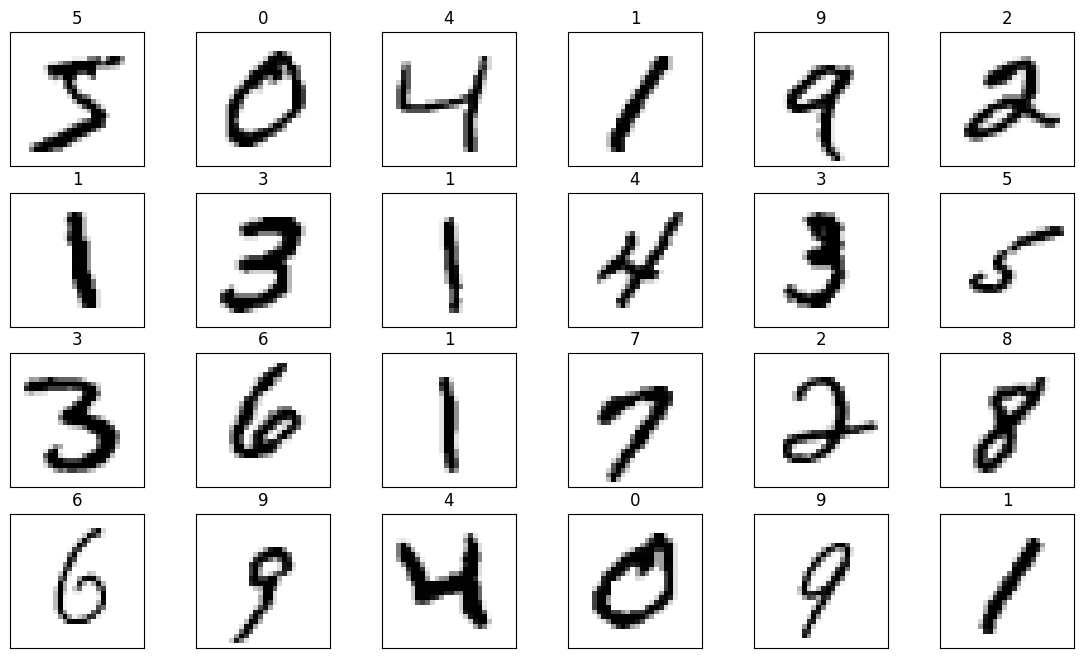

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(mnist.data[i], vmin=0, vmax=255, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))

**2.a) [1 mark]** We can imagine the MNIST digits as 784 (28 times 28) input neurons.  We want to connect these 784 neurons to 10 output neurons, one for each digit, and see how accurately we can classify the digits.  

To find the weights in this question, we will use Ridge Regression.  `X` is the MNIST input data, divided by 255 to rescale it to between 0 and 1, and then reshaped to be a 60000x784 matrix

```
X = mnist.data.reshape((60000,28*28)).float()/255
```

The target data T is a "one-hot" representation of our outputs.  That is, instead of the desired output to be `5`, the output should be `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]` and if the desired output should be `0`, that would be `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`.  

```
T = torch.nn.functional.one_hot(mnist.targets).float()
```

If our output is `Y=X @ W`, we need to find `W` such that `Y` is as close as possible to `T`.  For Ridge Regression, this is computed as

```
W = torch.inverse(X.T @ X + lambd*I) @ (X.T @ T)
```

where `I` is an identity matrix of the correct size (`torch.eye(784).float()`) and `lambd` is the $\lambda$ parameter that stops the regression from overfitting.

When building any sort of classifier model, we generally want to create the model using one set of data, and then test it on another set of data.  Here, we will use the first 5,000 data points for creating ("training") the model, and the other 55,000 for testing:

```
N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
```

Given this data, you should find `W` using *only* the `X_train` and `T_train` data.  Once you find `W` you can apply it to the `X_train` and `X_test` to get `Y_train` and `Y_test`

```
Y_train = X_train @ W
Y_test = X_test @ W
```

Finally, you can compute the accuracy by determining when the output is the correct category.  Here we will do this by counting when the largest output value in each row in `Y` is at the same spot as the largest output value in each row in `T`:

```
accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)
```

- Compute the training and testing accuracy when $\lambda=1$ and we use the first 5,000 data points as for training (and test on the remaining 55,000).  Report both numbers.  
- Do we expect the testing accuracy to be larger or smaller than the training accuracy?  Why?


In [9]:
import torch
import torchvision
from torch.nn.functional import one_hot

# Download MNIST dataset
mnist = torchvision.datasets.MNIST(root='.', download=True)

# Reshape and normalize the input data
X = mnist.data.reshape((60000, 28*28)).float() / 255

# One-hot encode the target data
T = one_hot(mnist.targets).float()

# Split data into training and testing sets
N = 5000
X_train, X_test = X[:N], X[N:]
T_train, T_test = T[:N], T[N:]

# Ridge Regression parameters
lambd = 1.0
I = torch.eye(28*28).float()

# Finding W using training data
W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)

# Applying W to training and testing data
Y_train = X_train @ W
Y_test = X_test @ W

# Computing accuracies
accuracy_train = torch.sum(torch.argmax(Y_train, axis=1) == torch.argmax(T_train, axis=1)) / len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1) == torch.argmax(T_test, axis=1)) / len(Y_test)

# Reporting accuracies
print(f"Training Accuracy: {accuracy_train.item()}")
print(f"Testing Accuracy: {accuracy_test.item()}")

Training Accuracy: 0.9034000039100647
Testing Accuracy: 0.8191817998886108


- Do we expect the testing accuracy to be larger or smaller than the training accuracy?  Why?

We expect the testing accuracy to be less than the training accuracy, as the weight matrix was trained on the training data and thus will be less accurate for unseen data.

**2. b) [2 marks]**  Repeat part a) but vary the value of `lambd` from $10^{-5}$ to $10^5$.   You can use a `for` loop such as `for lambd in np.logspace(-5, 5, 11):`.  

- Generate a single plot that shows the training and testing accuracy.  Make sure to label your axes and the lines on the plot.  

- What is the best value for `lambd` (i.e. the value for which we get the best training accuracy).  
- Why does changing `lambd` affect the accuracy?  
- Why would having a large `lambd` value be good for making a biologically realistic model?

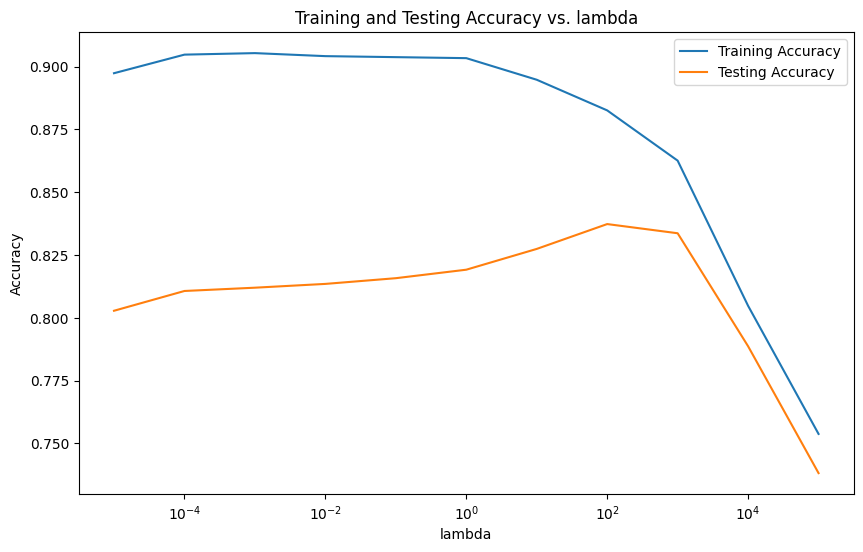

The best value for lambda is: 0.001


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Vary lambd values
lambd_values = np.logspace(-5, 5, 11)

# Initialize lists to store accuracies
training_accuracies_b = []
testing_accuracies_b = []

# Ridge Regression and accuracy calculation for each lambd
for lambd in lambd_values:
    # Ridge Regression parameters
    I = torch.eye(28*28).float()

    # Finding W using training data
    W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)

    # Applying W to training and testing data
    Y_train = X_train @ W
    Y_test = X_test @ W

    # Computing accuracies
    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1) == torch.argmax(T_train, axis=1)) / len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1) == torch.argmax(T_test, axis=1)) / len(Y_test)

    # Append accuracies to lists
    training_accuracies_b.append(accuracy_train.item())
    testing_accuracies_b.append(accuracy_test.item())

# Generate a single plot
plt.figure(figsize=(10, 6))
plt.semilogx(lambd_values, training_accuracies_b, label='Training Accuracy')
plt.semilogx(lambd_values, testing_accuracies_b, label='Testing Accuracy')
plt.title('Training and Testing Accuracy vs. lambda')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Find the best value for lambda
best_lambd = lambd_values[np.argmax(training_accuracies_b)]
print(f"The best value for lambda is: {best_lambd}")

- What is the best value for `lambd` (i.e. the value for which we get the best training accuracy).  

The lambda that gives the best training accuracy is 0.001.

- Why does changing `lambd` affect the accuracy?  

Changing lambda affects accuracy because it controls the regularization strength. Higher lambda values lead to stronger regularization, preventing overfitting by penalizing large weights.

- Why would having a large `lambd` value be good for making a biologically realistic model?

Having a large lambda value is good for a biologically realistic model because it helps prevent overfitting and makes the model more robust to variations in the input data. This is important for generalization, which is a desirable characteristic in biologically inspired models.

**2. c) [1 mark]** The input we have used so far is not very realistic.  In real life, when we see written digits, they are under a wide range of lighting conditions. For this question, we change `X` by scaling it randomly and adding a random background brightness.

```
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000)[:,None]) + torch.rand(60000)[:,None]
```

To see what this looks like, here is how you can plot it:

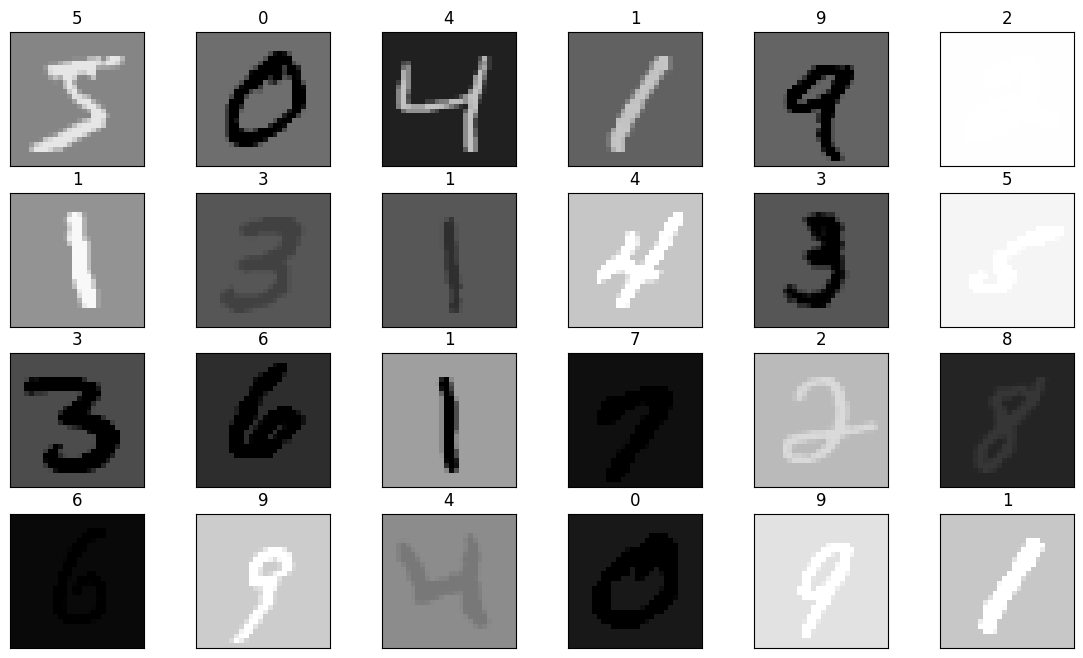

In [11]:
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]

plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(X[i].reshape(28,28), vmin=0, vmax=1, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))

- Generate the same plot as in 2b) but for this new dataset.  
- Is this a harder or easier task than with the original dataset?
- Is this new dataset more like the data at the retina or like the data in the ganglion cells?
- Is the original dataset more like the data at the retina or like the data in the ganglion cells?

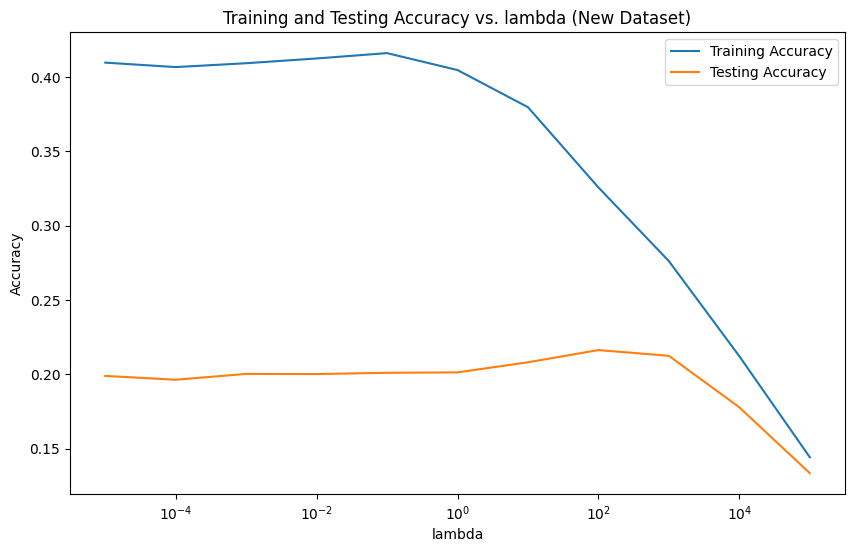

Original dataset max accuracy: 0.8373454809188843
New dataset max accuracy: 0.21632727980613708
The new dataset is a harder task than the original dataset.


In [12]:
T = one_hot(mnist.targets).float()

N = 5000
X_train, X_test = X[:N], X[N:]
T_train, T_test = T[:N], T[N:]

lambd_values = np.logspace(-5, 5, 11)

training_accuracies_c = []
testing_accuracies_c = []

for lambd in lambd_values:
    I = torch.eye(28*28).float()
    W = torch.pinverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)

    Y_train = X_train @ W
    Y_test = X_test @ W

    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1) == torch.argmax(T_train, axis=1)) / len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1) == torch.argmax(T_test, axis=1)) / len(Y_test)

    training_accuracies_c.append(accuracy_train.item())
    testing_accuracies_c.append(accuracy_test.item())

plt.figure(figsize=(10, 6))
plt.semilogx(lambd_values, training_accuracies_c, label='Training Accuracy')
plt.semilogx(lambd_values, testing_accuracies_c, label='Testing Accuracy')
plt.title('Training and Testing Accuracy vs. lambda (New Dataset)')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

original_accuracy_test = max(testing_accuracies_b)
new_accuracy_test = max(testing_accuracies_c)
print(f"Original dataset max accuracy: {original_accuracy_test}")
print(f"New dataset max accuracy: {new_accuracy_test}")

if new_accuracy_test > original_accuracy_test:
    print("The new dataset is an easier task than the original dataset.")
else:
    print("The new dataset is a harder task than the original dataset.")

- Is this a harder or easier task than with the original dataset?

This is a harder task than with the original dataset. Changing the random background brightness makes it harder for the model to distinguish and recognize patterns in the images. The addition of random scaling and background brightness introduces more variability and complexity to the data, making it challenging for the model to generalize effectively. This increased difficulty is reflected in the observed decrease in testing accuracy, with a max testing accuracy of 21.2% for the new dataset compared to the max testing accuracy of 83.7% for the original dataset.

- Is this new dataset more like the data at the retina or like the data in the ganglion cells?

The new dataset, with random scaling and added background brightness, is more like the data at the retina. The changes introduced in the new dataset, such as scaling and background variations, simulate variations in the raw sensory input captured by the photoreceptor cells in the retina. These modifications mimic the initial processing stages where raw visual information is received and undergoes basic transformations.

- Is the original dataset more like the data at the retina or like the data in the ganglion cells?

The original dataset is more like the data at the ganglion cells. The original MNIST dataset, representing handwritten digits, has already undergone some level of abstraction and processing, similar to the intermediate processing that occurs in the retina, involving bipolar and horizontal cells. The original dataset provides a more processed and abstracted representation compared to the raw sensory input at the retina.

**2. d) [1 mark]** We can think of neurons in the visual system as transforming the data in various ways.  Given the dataset in 2c), neurons might be able to transform it to look more like the origin data.

Here are three data transformations that could be applied here:

Subtracting the Mean
```
X = X-torch.mean(X, axis=1)[:,None]
```

Absolute value
```
X = torch.abs(X)
```

Normalizing
```
X = X/torch.linalg.norm(X, axis=1)[:,None]
```

- Apply all three of them (in the order shown above) to the dataset and generate the same graph as in 2b) and 2c).
- How does the performance of the network compare to that of 2b) and 2c)?
- Do any of the three transformations above correspond to processing that occurs in the eye before the signal is sent to the rest of the brain?
- Given this result, why does the eye transform the data between raw rods & cones and the ganglion cells?

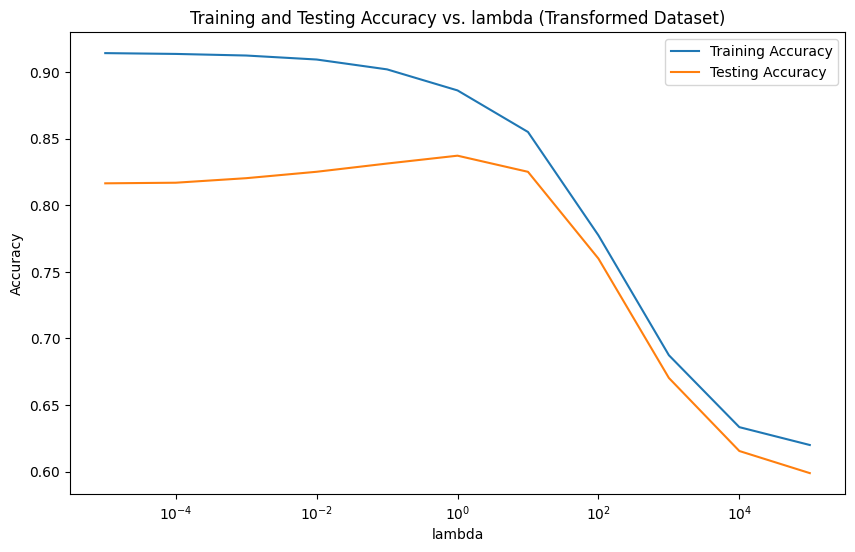

Original dataset max accuracy: 0.8373454809188843
New dataset max accuracy: 0.21632727980613708
Transformed dataset max accuracy: 0.8371999859809875


In [14]:
X = X-torch.mean(X, axis=1)[:,None]
X = torch.abs(X)
X = X/torch.linalg.norm(X, axis=1)[:,None]

T = one_hot(mnist.targets).float()

N = 5000
X_train, X_test = X[:N], X[N:]
T_train, T_test = T[:N], T[N:]

lambd_values = np.logspace(-5, 5, 11)

training_accuracies_d = []
testing_accuracies_d = []

for lambd in lambd_values:
    I = torch.eye(28*28).float()
    W = torch.pinverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)

    Y_train = X_train @ W
    Y_test = X_test @ W

    accuracy_train = torch.sum(torch.argmax(Y_train, axis=1) == torch.argmax(T_train, axis=1)) / len(Y_train)
    accuracy_test = torch.sum(torch.argmax(Y_test, axis=1) == torch.argmax(T_test, axis=1)) / len(Y_test)

    training_accuracies_d.append(accuracy_train.item())
    testing_accuracies_d.append(accuracy_test.item())

plt.figure(figsize=(10, 6))
plt.semilogx(lambd_values, training_accuracies_d, label='Training Accuracy')
plt.semilogx(lambd_values, testing_accuracies_d, label='Testing Accuracy')
plt.title('Training and Testing Accuracy vs. lambda (Transformed Dataset)')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

original_accuracy_test = max(testing_accuracies_b)
new_accuracy_test = max(testing_accuracies_c)
transformed_accuracy_test = max(testing_accuracies_d)

print(f"Original dataset max accuracy: {original_accuracy_test}")
print(f"New dataset max accuracy: {new_accuracy_test}")
print(f"Transformed dataset max accuracy: {transformed_accuracy_test}")

- How does the performance of the network compare to that of 2b) and 2c)?

The transformed dataset achieved a max testing accuracy of 83.7%, which is comparable to the original dataset's accuracy of 83.7%. Both datasets outperform the new dataset with random scaling and added background brightness, which had a significantly lower testing accuracy of 21.6%.

- Do any of the three transformations above correspond to processing that occurs in the eye before the signal is sent to the rest of the brain?

The subtraction of the mean and normalization in the transformations roughly corresponds to processing that occurs in the eye before the signal is sent to the rest of the brain. The mean subtraction aligns with the adaptation of the retina to variations in illumination, and normalization can be associated with the contrast adaptation that occurs in retinal processing.

- Given this result, why does the eye transform the data between raw rods & cones and the ganglion cells?

The eye transforms data between raw rods and cones and the ganglion cells to enhance the salient features of the visual input, adapt to different lighting conditions, and improve the efficiency of information transmission. The transformations in the retina, such as mean subtraction and normalization, contribute to the adaptation of the visual system to varying environmental conditions. These transformations help in emphasizing relevant visual information and filtering out irrelevant details, making the representation more robust and facilitating effective processing by subsequent stages in the visual pathway.

# 3. Classifying Stimuli Using Backpropogation

Regression is restricted to learning the layer of weights that produces the final output.  If we want to also learn what features are most useful for producing that output, we need a more complex learning rule, and this is typically backpropogation.  Here we will classify the same data as in question 2, and we will build up different network structures to do so.

Backpropogation tends to work best when learning on a bunch of data at the same time (a "batch").  The following code will set up the same training and testing data as in question 2, but presented in randomized batches of 1000 at a time.

```python
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)
```

To create a neural network, we need to define what the weights are we will learn and we need to define the computation that the network will perform.  Here is the definition of a simple network that has an input of 784 values (the MNIST inputs), which go to 50 "hidden"-layer neurons, and then to the output 10 neurons.  So the network will learn to transform the 784 inputs into 50 new representations, and from those 50 features it will learn weights to create an output of 10 values (our 10 categories).  This is known as a multi-layer perceptron, or a standard neural network with a single hidden layer.

```python
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()
```

Finally, we need to train our model.  When training, it is useful to keep track of how well the model is doing on the testing data.  Since testing the network takes time, we don't necessarily want to do it all the time.  Instead, the following code trains the network 10 times, and then records how well the network does on the training data and on the testing data.

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  

mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()

# create the learning rule
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


Given the above code, you can train your network 10 times by doing

```python
for i in range(10):
    continue_training()
```

If you want to continue training even more, you can just run that `for` loop again.

To plot the final accuracy results, you can use

```python
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()
```

**3. a) [1 mark]** Run the model above for 10 iterations (i.e. call `continue_training` 10 times).

- Plot the training and testing accuracy.  
- Is this model better or worse than the best models developed in question 2?

In [77]:
for i in range(10):
    continue_training()

/var/folders/zz/c5vwdr1x3sd7k7qfw66pt9240000gn/T/ipykernel_60922/894367666.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8478000164031982
Iteration 1 Testing accuracy: 0.8432000279426575
Iteration 2 Training accuracy: 0.8999999761581421
Iteration 2 Testing accuracy: 0.8840000033378601
Iteration 3 Training accuracy: 0.9160000085830688
Iteration 3 Testing accuracy: 0.8953999876976013
Iteration 4 Training accuracy: 0.9229999780654907
Iteration 4 Testing accuracy: 0.9016000032424927
Iteration 5 Training accuracy: 0.9319999814033508
Iteration 5 Testing accuracy: 0.9052000045776367
Iteration 6 Training accuracy: 0.9368000030517578
Iteration 6 Testing accuracy: 0.9071999788284302
Iteration 7 Training accuracy: 0.9405999779701233
Iteration 7 Testing accuracy: 0.9070000052452087
Iteration 8 Training accuracy: 0.9444000124931335
Iteration 8 Testing accuracy: 0.9110000133514404
Iteration 9 Training accuracy: 0.9462000131607056
Iteration 9 Testing accuracy: 0.9107999801635742
Iteration 10 Training accuracy: 0.9513999819755554
Iteration 10 Testing accuracy: 0.9124000072479248


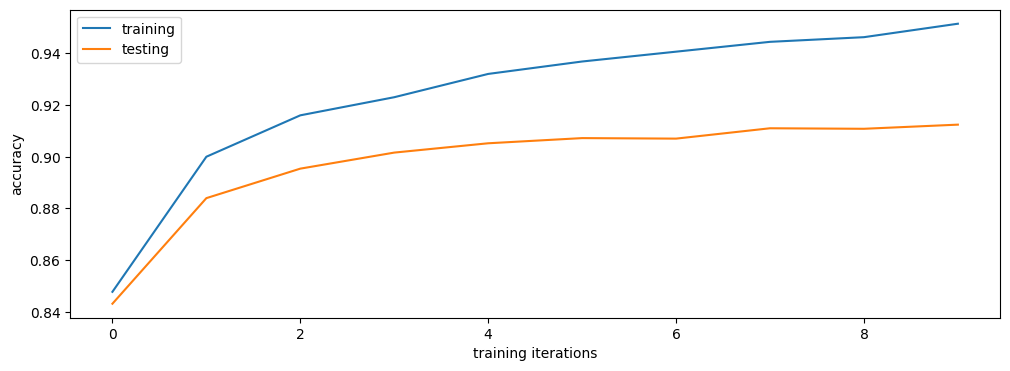

PART 3A), FINAL TESTING ACCURACY: 91.24%


In [78]:
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

print(f"PART 3A), FINAL TESTING ACCURACY: {np.round(accuracy_test[-1] * 100, 2)}%")

- Is this model better or worse than the best models developed in question 2?

This model is better than the best models developed in question 2, outperforming them all with a final testing accuracy of 91.24%.

**3. b) [1 mark]** Repeat question 3a five times.  This does not mean to run a single model for 50 iterations.  Rather, you need to reset the model and train it again.  The easiest way to do this is to recreate the network and the optimizer like this:

```python
network = Net()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)
```

- Make a plot showing the 5 different training accuracies and 5 different testing accuracies
- Also show the average training and testing accuracy on the plot.
- Each of the 5 models should show slightly different accuracies.  Why is this the case?


In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  
import torchvision
import numpy as np
import matplotlib.pyplot as plt

mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
# Initialize variables to store accuracies for each run
all_accuracy_train = []
all_accuracy_test = []

# Repeat the training process 5 times
for _ in range(5):
    # Create the network and optimizer
    network = Net()
    optimizer = optim.SGD(network.parameters(), 
                          lr=0.1,
                          momentum=0.5)
    
    # Variables to keep track of the training and testing accuracy for each run
    accuracy_train = []
    accuracy_test = []

    def continue_training():
        network.train()
        for i in range(10):
            correct = 0
            for data, target in train_loader:
                optimizer.zero_grad()
                output = network(data)
                loss = F.nll_loss(output, target)
                loss.backward()
                optimizer.step()
                
                pred = output.data.max(1, keepdim=True)[1]
                correct += pred.eq(target.data.view_as(pred)).sum()
        score = float(correct/len(train_loader.dataset))
        accuracy_train.append(score)
        print('Iteration', len(accuracy_train), 'Training accuracy:', score)

        correct = 0
        network.eval()
        for data, target in test_loader:
            output = network(data)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
        score = float(correct/len(test_loader.dataset))
        accuracy_test.append(score)
        print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

    # Run the training process
    for i in range(10):
        continue_training()

    # Append the accuracies for each run to the list
    all_accuracy_train.append(accuracy_train)
    all_accuracy_test.append(accuracy_test)


/var/folders/zz/c5vwdr1x3sd7k7qfw66pt9240000gn/T/ipykernel_60922/4011359748.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8586000204086304
Iteration 1 Testing accuracy: 0.8565999865531921
Iteration 2 Training accuracy: 0.9017999768257141
Iteration 2 Testing accuracy: 0.885200023651123
Iteration 3 Training accuracy: 0.9161999821662903
Iteration 3 Testing accuracy: 0.894599974155426
Iteration 4 Training accuracy: 0.9261999726295471
Iteration 4 Testing accuracy: 0.9025999903678894
Iteration 5 Training accuracy: 0.9332000017166138
Iteration 5 Testing accuracy: 0.9017999768257141
Iteration 6 Training accuracy: 0.9401999711990356
Iteration 6 Testing accuracy: 0.906000018119812
Iteration 7 Training accuracy: 0.9426000118255615
Iteration 7 Testing accuracy: 0.9088000059127808
Iteration 8 Training accuracy: 0.9470000267028809
Iteration 8 Testing accuracy: 0.9100000262260437
Iteration 9 Training accuracy: 0.9503999948501587
Iteration 9 Testing accuracy: 0.9101999998092651
Iteration 10 Training accuracy: 0.9535999894142151
Iteration 10 Testing accuracy: 0.9114000201225281
Iteration 1

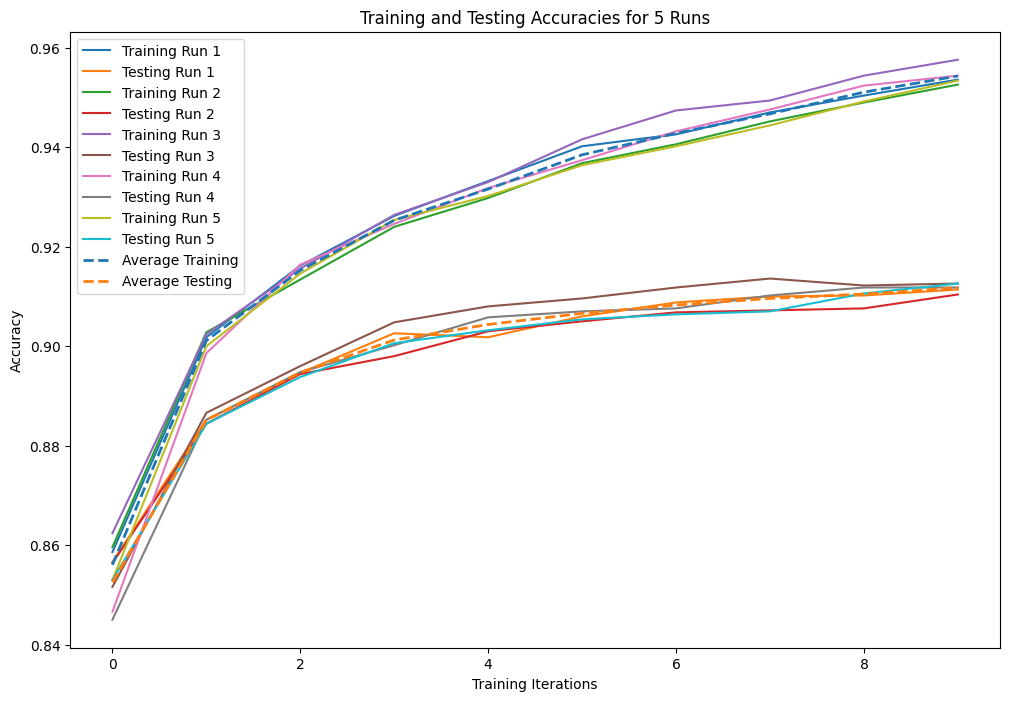

PART 3B), FINAL TESTING ACCURACY: 91.18%


In [80]:
# Plot the training and testing accuracies for each run
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.plot(all_accuracy_train[i], label=f'Training Run {i + 1}')
    plt.plot(all_accuracy_test[i], label=f'Testing Run {i + 1}')

# Calculate and plot the average accuracies
average_accuracy_train = np.mean(all_accuracy_train, axis=0)
average_accuracy_test = np.mean(all_accuracy_test, axis=0)

plt.plot(average_accuracy_train, label='Average Training', linestyle='--', linewidth=2)
plt.plot(average_accuracy_test, label='Average Testing', linestyle='--', linewidth=2)

plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for 5 Runs')
plt.show()

print(f"PART 3B), FINAL TESTING ACCURACY: {np.round(average_accuracy_test[-1] * 100, 2)}%")

- Each of the 5 models should show slightly different accuracies.  Why is this the case?

The slight differences in accuracies among the 5 models arise due to the random initialization of the neural network's weights and biases. When you create a new instance of the neural network and optimizer, the initial values of the parameters are set randomly. This randomness introduces variability in the learning process, leading to different trajectories during training.

**3. c) [1 mark]** Repeat question 3b varying the number of neurons in the hidden layer of the network.  The current value is 50.  Try it with 5, 10, 20, 50, and 100 neurons.  For each number of neurons, repeat five times and take the average (like in question 3b).  

- Plot the final testing accuracy on the y-axis and the number of neurons on the x-axis.  Note that to speed things up you can remove the testing computation from continue_training until the very end, since we only need the final testing score.


In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  
import torchvision
import numpy as np
import matplotlib.pyplot as plt

mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self, num_neurons):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, num_neurons)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(num_neurons, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
def continue_training(network, optimizer, num_iterations):
    network.train()
    for i in range(num_iterations):
        correct = 0
        for data, target in train_loader:
            optimizer.zero_grad()
            output = network(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    score = float(correct/len(train_loader.dataset))
    return score

# Variables to keep track of the testing accuracy for each number of neurons
neuron_values = [5, 10, 20, 50, 100]
average_accuracy_test = []

# Repeat the training process for different numbers of neurons
for num_neurons in neuron_values:
    # Initialize variables to store testing accuracies for each run
    accuracies_test = []

    # Repeat the training process 5 times for each number of neurons
    for _ in range(5):
        # Create the network and optimizer
        network = Net(num_neurons)
        optimizer = optim.SGD(network.parameters(), 
                              lr=0.1,
                              momentum=0.5)

        # Run the training process and get the training accuracy
        training_accuracy = continue_training(network, optimizer, num_iterations=10)

        # Compute the testing accuracy (only at the end)
        correct = 0
        network.eval()
        for data, target in test_loader:
            output = network(data)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
        
        # Calculate the testing accuracy and append to the list
        score_test = float(correct/len(test_loader.dataset))
        accuracies_test.append(score_test)

    # Calculate and append the average testing accuracy for this number of neurons
    average_accuracy_test.append(np.mean(accuracies_test))

/var/folders/zz/c5vwdr1x3sd7k7qfw66pt9240000gn/T/ipykernel_60922/3320310926.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


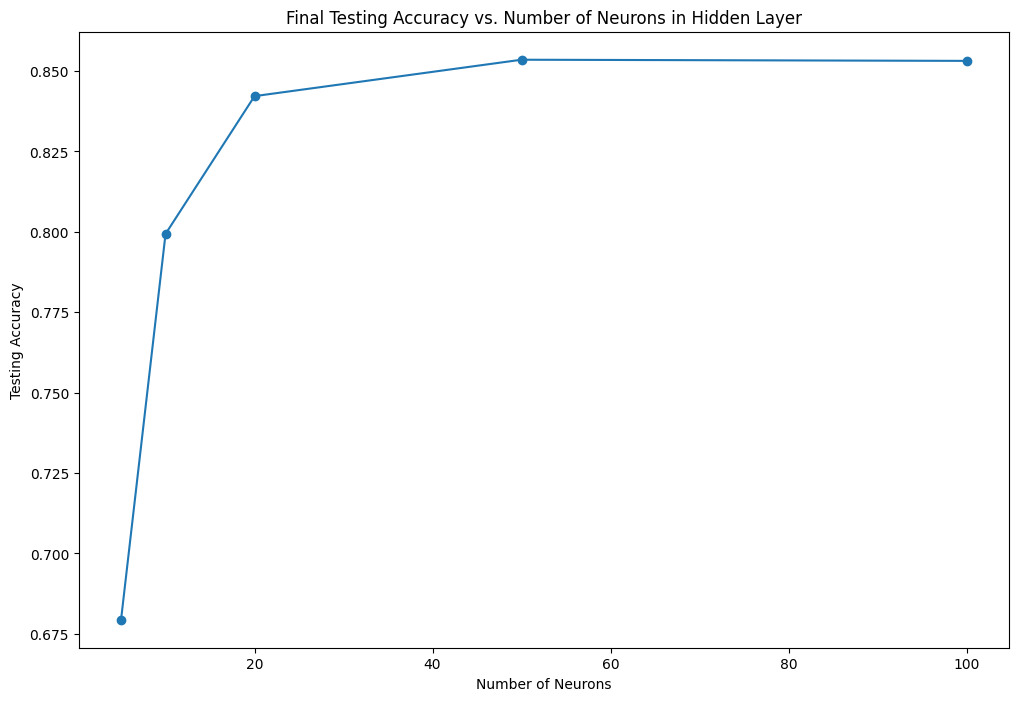

PART 3C), BEST FINAL TESTING ACCURACY: 85.32%


In [82]:
# Plot the final testing accuracy vs. number of neurons
plt.figure(figsize=(12, 8))
plt.plot(neuron_values, average_accuracy_test, marker='o')
plt.title('Final Testing Accuracy vs. Number of Neurons in Hidden Layer')
plt.xlabel('Number of Neurons')
plt.ylabel('Testing Accuracy')
plt.show()

print(f"PART 3C), BEST FINAL TESTING ACCURACY: {np.round(average_accuracy_test[-1] * 100, 2)}%")

**3. d) [2 marks]** Now we will add a convolution layer to our network.  The following network adds two convolution layers before two normal neural network layers.

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
```

The following code can be used to plot the learned features in the first layer:
```python
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()
```

- Train the model through 40 iterations and generate a plot of training and testing accuracy over time.
- Does this perform better or worse than the previous models in this assignment?
- What advantages and disadvantages do you see with this approach (in comparison to the previous parts of the assignment)?
- Plot the features learned by the first convolution layer.  How do they compare to real features detected in the V1 area of the brain?

In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# Define the network with convolution layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

# Create the network and optimizer
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.1, momentum=0.5)

# Variables to keep track of training and testing accuracy
accuracy_train = []
accuracy_test = []

# Training process
for i in range(40):
    network.train()
    correct_train = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        pred_train = output.data.max(1, keepdim=True)[1]
        correct_train += pred_train.eq(target.data.view_as(pred_train)).sum()
    
    # Calculate training accuracy and append to the list
    score_train = float(correct_train/len(train_loader.dataset))
    accuracy_train.append(score_train)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score_train)

    # Evaluate the model on the test set
    network.eval()
    correct_test = 0
    for data, target in test_loader:
        output = network(data)
        pred_test = output.data.max(1, keepdim=True)[1]
        correct_test += pred_test.eq(target.data.view_as(pred_test)).sum()

    # Calculate testing accuracy and append to the list
    score_test = float(correct_test/len(test_loader.dataset))
    accuracy_test.append(score_test)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score_test)

/var/folders/zz/c5vwdr1x3sd7k7qfw66pt9240000gn/T/ipykernel_60922/1966666041.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.16279999911785126
Iteration 1 Testing accuracy: 0.1770000010728836
Iteration 2 Training accuracy: 0.21860000491142273
Iteration 2 Testing accuracy: 0.27480000257492065
Iteration 3 Training accuracy: 0.4293999969959259
Iteration 3 Testing accuracy: 0.5145999789237976
Iteration 4 Training accuracy: 0.5465999841690063
Iteration 4 Testing accuracy: 0.616599977016449
Iteration 5 Training accuracy: 0.498199999332428
Iteration 5 Testing accuracy: 0.19259999692440033
Iteration 6 Training accuracy: 0.42160001397132874
Iteration 6 Testing accuracy: 0.5091999769210815
Iteration 7 Training accuracy: 0.6758000254631042
Iteration 7 Testing accuracy: 0.7411999702453613
Iteration 8 Training accuracy: 0.6931999921798706
Iteration 8 Testing accuracy: 0.7721999883651733
Iteration 9 Training accuracy: 0.8360000252723694
Iteration 9 Testing accuracy: 0.8503999710083008
Iteration 10 Training accuracy: 0.8564000129699707
Iteration 10 Testing accuracy: 0.8650000095367432
Itera

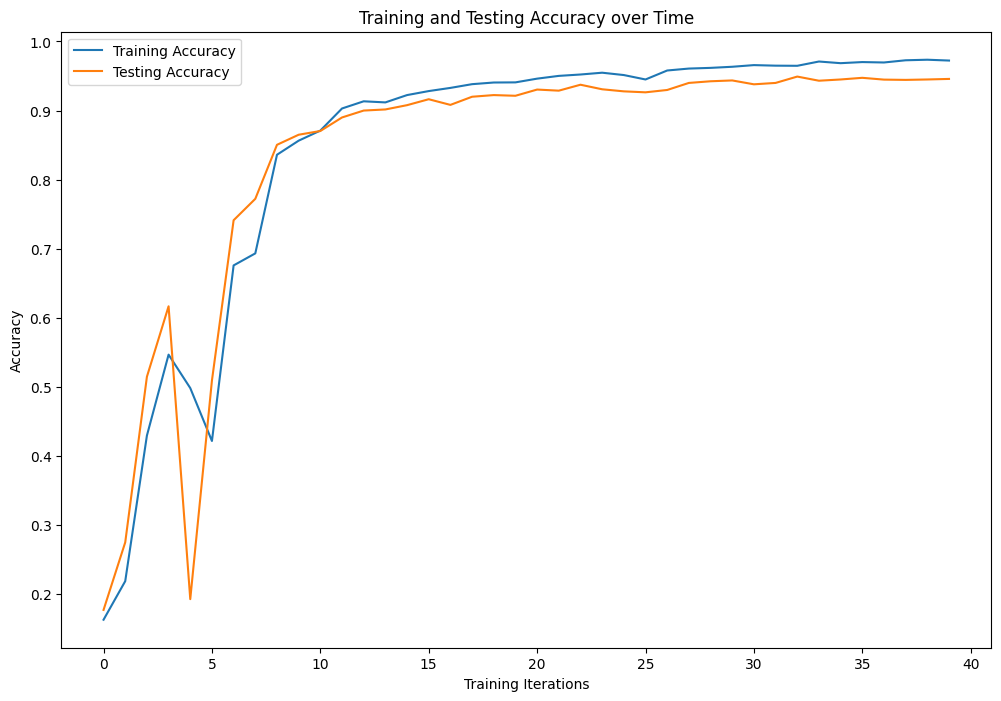

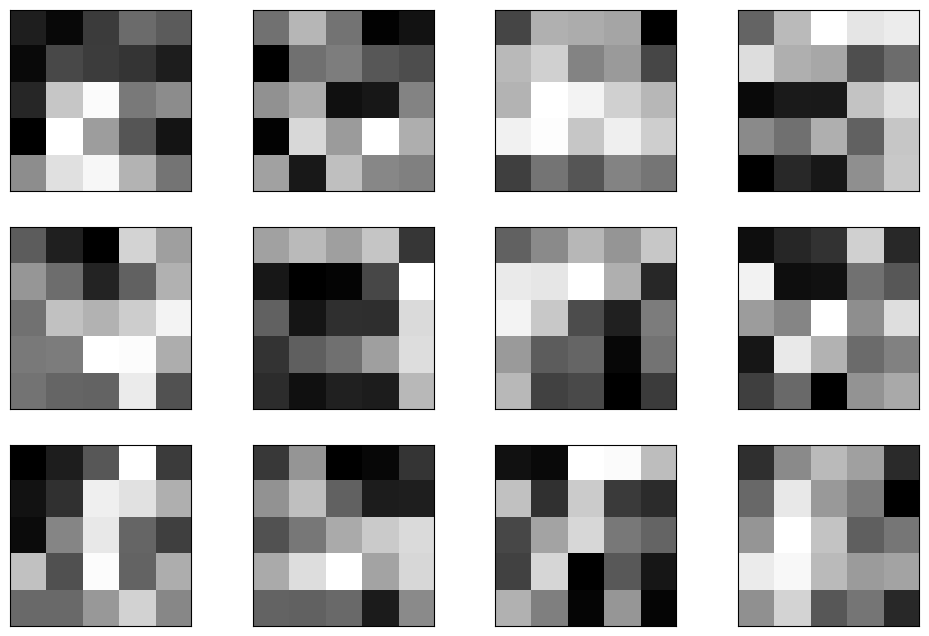

PART 3D), FINAL TESTING ACCURACY: 94.58%


In [84]:
# Plot training and testing accuracy over time
plt.figure(figsize=(12, 8))
plt.plot(accuracy_train, label='Training Accuracy')
plt.plot(accuracy_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Time')
plt.show()

# Plot the learned features in the first convolution layer
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

print(f"PART 3D), FINAL TESTING ACCURACY: {np.round(accuracy_test[-1] * 100, 2)}%")

- Does this perform better or worse than the previous models in this assignment?

This performs better than the previous models in this assignment, outperforming them all with a final testing accuracy of 94.58%.

- What advantages and disadvantages do you see with this approach (in comparison to the previous parts of the assignment)?

Convolutional layers are designed to capture spatial patterns, making them effective for tasks like image classification. The use of shared weights (kernels) in convolutional layers allows the model to learn spatially invariant features, reducing the number of parameters and enhancing generalization. However, the additional complexity of convolutional layers introduces more parameters and computations, which can increase training time and require larger datasets for effective training. Simpler models, such as those based on ridge regression or basic neural network layers, may have fewer parameters and be computationally more efficient.

- Plot the features learned by the first convolution layer.  How do they compare to real features detected in the V1 area of the brain?

The V1 area of the brain is responsible for detecting features such as edges and lines. This is what is represented in the first convolution layer; smaller features which can then be inferred to understand shapes, in this case numbers. For example, in the top right kernel, there are black horizontal lines (weight of zero) with a light horizontal line (higher weights) in-between. This kernel is sensitive to detecting horizontal lines.

**BONUS [1 mark]** Try to improve the neural network.  You want to get the best testing accuracy you can.  Try at least two different approaches and report your results.

I will be trying three approaches:
1. Using data augmentation (random rotation)
2. Using Adam as our optimizer instead of Stochastic Gradient Descent
3. The combination of both

I will be using an increased number of epochs (100) to allow time for convergence

In [1]:
# Data augmentation

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data with data augmentation
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

mnist = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# Define the network with convolution layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

# Create the network and optimizer
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.1, momentum=0.5)

# Variables to keep track of training and testing accuracy
accuracy_train = []
accuracy_test = []

# Training process with data augmentation
for i in range(100):
    network.train()
    correct_train = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        pred_train = output.data.max(1, keepdim=True)[1]
        correct_train += pred_train.eq(target.data.view_as(pred_train)).sum()
    
    # Calculate training accuracy and append to the list
    score_train = float(correct_train/len(train_loader.dataset))
    accuracy_train.append(score_train)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score_train)

    # Evaluate the model on the test set
    network.eval()
    correct_test = 0
    for data, target in test_loader:
        output = network(data)
        pred_test = output.data.max(1, keepdim=True)[1]
        correct_test += pred_test.eq(target.data.view_as(pred_test)).sum()

    # Calculate testing accuracy and append to the list
    score_test = float(correct_test/len(test_loader.dataset))
    accuracy_test.append(score_test)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score_test)

/var/folders/zz/c5vwdr1x3sd7k7qfw66pt9240000gn/T/ipykernel_80472/1439030165.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.1096000000834465
Iteration 1 Testing accuracy: 0.10400000214576721
Iteration 2 Training accuracy: 0.1111999973654747
Iteration 2 Testing accuracy: 0.14000000059604645
Iteration 3 Training accuracy: 0.20880000293254852
Iteration 3 Testing accuracy: 0.37779998779296875
Iteration 4 Training accuracy: 0.47839999198913574
Iteration 4 Testing accuracy: 0.5121999979019165
Iteration 5 Training accuracy: 0.5712000131607056
Iteration 5 Testing accuracy: 0.3336000144481659
Iteration 6 Training accuracy: 0.33640000224113464
Iteration 6 Testing accuracy: 0.40059998631477356
Iteration 7 Training accuracy: 0.45680001378059387
Iteration 7 Testing accuracy: 0.5622000098228455
Iteration 8 Training accuracy: 0.6552000045776367
Iteration 8 Testing accuracy: 0.7324000000953674
Iteration 9 Training accuracy: 0.6262000203132629
Iteration 9 Testing accuracy: 0.7085999846458435
Iteration 10 Training accuracy: 0.7929999828338623
Iteration 10 Testing accuracy: 0.8446000218391418


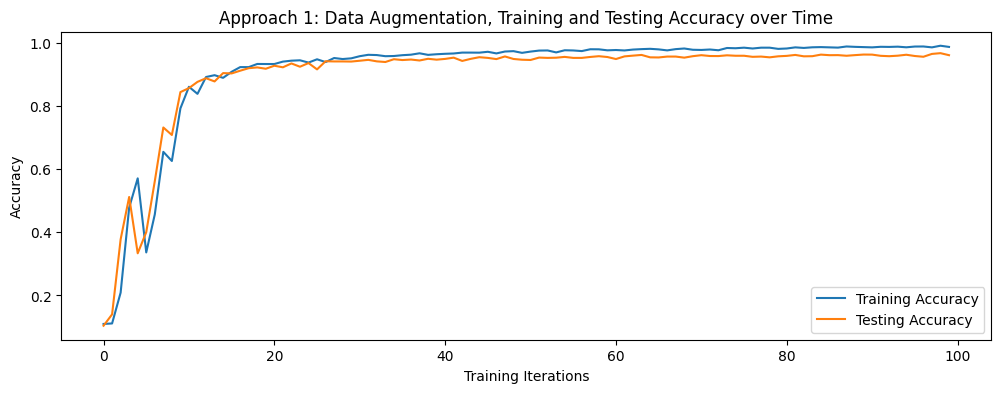

BONUS, APPROACH 1: DATA AUGMENTATION, FINAL TESTING ACCURACY: 96.16%


In [2]:
# Plot training and testing accuracy over time
plt.figure(figsize=(12, 4))
plt.plot(accuracy_train, label='Training Accuracy')
plt.plot(accuracy_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('Approach 1: Data Augmentation, Training and Testing Accuracy over Time')
plt.show()

print(f"BONUS, APPROACH 1: DATA AUGMENTATION, FINAL TESTING ACCURACY: {np.round(accuracy_test[-1] * 100, 2)}%")

In [4]:
# Adam instead of SGD

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
])

mnist = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# Define the network with convolution layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

# Create the network and optimizer
network = Net()
optimizer = optim.Adam(network.parameters(), lr=0.001, betas=(0.9, 0.999))

# Variables to keep track of training and testing accuracy
accuracy_train = []
accuracy_test = []

# Training process with data augmentation
for i in range(100):
    network.train()
    correct_train = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        pred_train = output.data.max(1, keepdim=True)[1]
        correct_train += pred_train.eq(target.data.view_as(pred_train)).sum()
    
    # Calculate training accuracy and append to the list
    score_train = float(correct_train/len(train_loader.dataset))
    accuracy_train.append(score_train)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score_train)

    # Evaluate the model on the test set
    network.eval()
    correct_test = 0
    for data, target in test_loader:
        output = network(data)
        pred_test = output.data.max(1, keepdim=True)[1]
        correct_test += pred_test.eq(target.data.view_as(pred_test)).sum()

    # Calculate testing accuracy and append to the list
    score_test = float(correct_test/len(test_loader.dataset))
    accuracy_test.append(score_test)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score_test)

/var/folders/zz/c5vwdr1x3sd7k7qfw66pt9240000gn/T/ipykernel_80472/3486462386.py:39: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.19140000641345978
Iteration 1 Testing accuracy: 0.27639999985694885
Iteration 2 Training accuracy: 0.36340001225471497
Iteration 2 Testing accuracy: 0.525600016117096
Iteration 3 Training accuracy: 0.590399980545044
Iteration 3 Testing accuracy: 0.6466000080108643
Iteration 4 Training accuracy: 0.6711999773979187
Iteration 4 Testing accuracy: 0.7148000001907349
Iteration 5 Training accuracy: 0.7468000054359436
Iteration 5 Testing accuracy: 0.7972000241279602
Iteration 6 Training accuracy: 0.8040000200271606
Iteration 6 Testing accuracy: 0.8181999921798706
Iteration 7 Training accuracy: 0.8259999752044678
Iteration 7 Testing accuracy: 0.8284000158309937
Iteration 8 Training accuracy: 0.843999981880188
Iteration 8 Testing accuracy: 0.8503999710083008
Iteration 9 Training accuracy: 0.8637999892234802
Iteration 9 Testing accuracy: 0.8650000095367432
Iteration 10 Training accuracy: 0.8777999877929688
Iteration 10 Testing accuracy: 0.8745999932289124
Iteratio

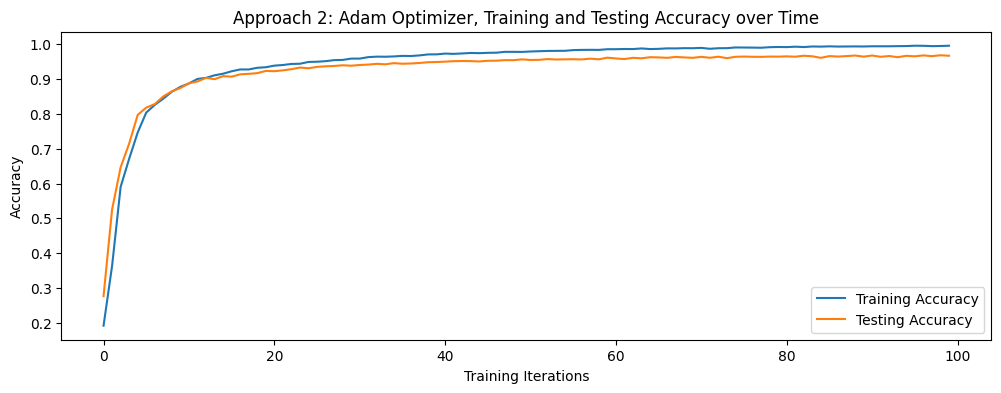

BONUS, APPROACH 2: ADAM OPTIMIZER, FINAL TESTING ACCURACY: 96.72%


In [5]:
# Plot training and testing accuracy over time
plt.figure(figsize=(12, 4))
plt.plot(accuracy_train, label='Training Accuracy')
plt.plot(accuracy_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('Approach 2: Adam Optimizer, Training and Testing Accuracy over Time')
plt.show()

print(f"BONUS, APPROACH 2: ADAM OPTIMIZER, FINAL TESTING ACCURACY: {np.round(accuracy_test[-1] * 100, 2)}%")

In [6]:
# Data Augmentation and Adam

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data with data augmentation
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

mnist = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# Define the network with convolution layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

# Create the network and optimizer
network = Net()
optimizer = optim.Adam(network.parameters(), lr=0.001, betas=(0.9, 0.999))

# Variables to keep track of training and testing accuracy
accuracy_train = []
accuracy_test = []

# Training process with data augmentation
for i in range(100):
    network.train()
    correct_train = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        pred_train = output.data.max(1, keepdim=True)[1]
        correct_train += pred_train.eq(target.data.view_as(pred_train)).sum()
    
    # Calculate training accuracy and append to the list
    score_train = float(correct_train/len(train_loader.dataset))
    accuracy_train.append(score_train)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score_train)

    # Evaluate the model on the test set
    network.eval()
    correct_test = 0
    for data, target in test_loader:
        output = network(data)
        pred_test = output.data.max(1, keepdim=True)[1]
        correct_test += pred_test.eq(target.data.view_as(pred_test)).sum()

    # Calculate testing accuracy and append to the list
    score_test = float(correct_test/len(test_loader.dataset))
    accuracy_test.append(score_test)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score_test)

/var/folders/zz/c5vwdr1x3sd7k7qfw66pt9240000gn/T/ipykernel_80472/1962479844.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.16619999706745148
Iteration 1 Testing accuracy: 0.186599999666214
Iteration 2 Training accuracy: 0.23839999735355377
Iteration 2 Testing accuracy: 0.303600013256073
Iteration 3 Training accuracy: 0.4196000099182129
Iteration 3 Testing accuracy: 0.5350000262260437
Iteration 4 Training accuracy: 0.5763999819755554
Iteration 4 Testing accuracy: 0.59579998254776
Iteration 5 Training accuracy: 0.6338000297546387
Iteration 5 Testing accuracy: 0.6582000255584717
Iteration 6 Training accuracy: 0.6844000220298767
Iteration 6 Testing accuracy: 0.7257999777793884
Iteration 7 Training accuracy: 0.7494000196456909
Iteration 7 Testing accuracy: 0.7694000005722046
Iteration 8 Training accuracy: 0.7922000288963318
Iteration 8 Testing accuracy: 0.801800012588501
Iteration 9 Training accuracy: 0.824999988079071
Iteration 9 Testing accuracy: 0.8353999853134155
Iteration 10 Training accuracy: 0.8425999879837036
Iteration 10 Testing accuracy: 0.8438000082969666
Iteration 11

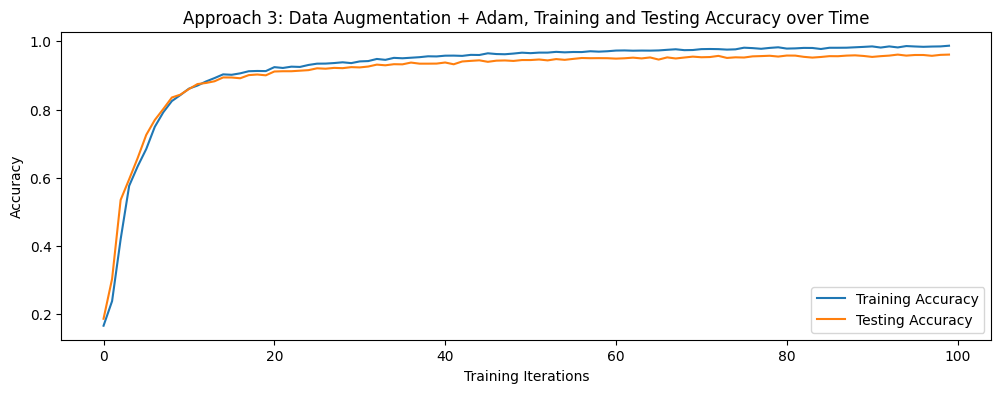

BONUS, APPROACH 3: DATA AUGMENTATION + ADAM, FINAL TESTING ACCURACY: 96.12%


In [7]:
# Plot training and testing accuracy over time
plt.figure(figsize=(12, 4))
plt.plot(accuracy_train, label='Training Accuracy')
plt.plot(accuracy_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('Approach 3: Data Augmentation + Adam, Training and Testing Accuracy over Time')
plt.show()

print(f"BONUS, APPROACH 3: DATA AUGMENTATION + ADAM, FINAL TESTING ACCURACY: {np.round(accuracy_test[-1] * 100, 2)}%")

**Results**

Original: PART 3d), FINAL TESTING ACCURACY: 94.58%
1. BONUS, APPROACH 1: DATA AUGMENTATION, FINAL TESTING ACCURACY: 96.16%
2. BONUS, APPROACH 2: ADAM OPTIMIZER, FINAL TESTING ACCURACY: 96.72%
3. BONUS, APPROACH 3: DATA AUGMENTATION + ADAM, FINAL TESTING ACCURACY: 96.12%

In conclusion, the approach where I used the Adam optimizer instead of SGD resulted in the best final testing accuracy of 96.72% (an improvement of 2.14%). Only using data augmentation and the combination of both approaches proved to be marginally worse than just the Adam optimizer, but still an improvment over 3d). 